# Importing 

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
path1 = "C:\\Users\\10\\Documents\\Repos\\Week_2\\Cab_Data.csv"
path2 = "C:\\Users\\10\\Documents\\Repos\\Week_2\\City.csv"
path3 = "C:\\Users\\10\\Documents\\Repos\\Week_2\\Customer_ID.csv"
path4 = "C:\\Users\\10\\Documents\\Repos\\Week_2\\Transaction_ID.csv"

In [57]:
dataset1 = pd.read_csv(path1)
dataset1

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [58]:
dataset2 = pd.read_csv(path2)
dataset2

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [59]:
dataset3 = pd.read_csv(path3)
dataset3

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [60]:
dataset4 = pd.read_csv(path4)
dataset4

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


# Data Types

In [61]:
print(dataset1.dtypes)

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object


In [62]:
print(dataset2.dtypes)

City          object
Population    object
Users         object
dtype: object


In [63]:
print(dataset3.dtypes)

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object


In [64]:
print(dataset4.dtypes)

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object


# Calculate companies' profit

In [65]:
cab_companies_profit = dataset1[['Company','Price Charged','Cost of Trip']]
cab_companies_profit = cab_companies_profit.groupby(['Company'],as_index=False).sum()
cab_companies_profit.insert(loc = 3 , column='profit', value = float )
cab_companies_profit['profit'] = cab_companies_profit['Price Charged'] - cab_companies_profit['Cost of Trip']
cab_companies_profit

,Company,Price Charged,Cost of Trip,profit
0,Pink Cab,2.632825e+07,2.102092e+07,5.307328e+06
1,Yellow Cab,1.258539e+08,8.183351e+07,4.402037e+07


# check NaN

In [66]:
dataset1.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [67]:
dataset2.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [68]:
dataset3.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [69]:
dataset4.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

# Merging Dataset 1 with 4 "Transaction ID"

In [70]:
merge1 = dataset1.merge(dataset4, how='left', on='Transaction ID', sort=True)
merge1

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


# Merging merge1 with dataset1 "Customer ID"

In [71]:
merge2 = merge1.merge(dataset3, how='left', on='Customer ID', sort=True)
merge2

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10008434,2016-02-06,Yellow Cab,NEW YORK NY,42.48,1422.30,576.0288,1,Cash,Male,36,16359
1,10012732,2016-03-04,Pink Cab,NEW YORK NY,42.40,703.09,457.9200,1,Card,Male,36,16359
2,10053182,2016-07-13,Yellow Cab,NEW YORK NY,8.12,233.10,100.3632,1,Card,Male,36,16359
3,10055394,2016-07-24,Yellow Cab,NEW YORK NY,20.52,564.04,278.2512,1,Cash,Male,36,16359
4,10074090,2016-09-03,Yellow Cab,NEW YORK NY,22.54,596.98,294.8232,1,Cash,Male,36,16359
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10393188,2018-10-19,Yellow Cab,BOSTON MA,8.00,114.87,111.3600,60000,Cash,Female,27,20303
359388,10425458,2018-12-15,Yellow Cab,BOSTON MA,10.40,141.24,124.8000,60000,Card,Female,27,20303
359389,10425480,2018-12-11,Yellow Cab,BOSTON MA,9.70,127.62,132.6960,60000,Card,Female,27,20303
359390,10434169,2018-12-28,Yellow Cab,BOSTON MA,35.64,603.94,487.5552,60000,Cash,Female,27,20303


# Check duplicates & null

In [72]:
duplicates = merge2.duplicated()
print(duplicates.sum())

0


In [73]:
merge2.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

# Rename and drop columns

In [74]:
master_dataset = merge2[['Customer ID', 'City', 'Income (USD/Month)', 'Gender', 'Age', 'Transaction ID', 'Date of Travel', 'Company', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Payment_Mode']]
master_dataset

,Customer ID,City,Income (USD/Month),Gender,Age,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Payment_Mode
0,1,NEW YORK NY,16359,Male,36,10008434,2016-02-06,Yellow Cab,42.48,1422.30,576.0288,Cash
1,1,NEW YORK NY,16359,Male,36,10012732,2016-03-04,Pink Cab,42.40,703.09,457.9200,Card
2,1,NEW YORK NY,16359,Male,36,10053182,2016-07-13,Yellow Cab,8.12,233.10,100.3632,Card
3,1,NEW YORK NY,16359,Male,36,10055394,2016-07-24,Yellow Cab,20.52,564.04,278.2512,Cash
4,1,NEW YORK NY,16359,Male,36,10074090,2016-09-03,Yellow Cab,22.54,596.98,294.8232,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,60000,BOSTON MA,20303,Female,27,10393188,2018-10-19,Yellow Cab,8.00,114.87,111.3600,Cash
359388,60000,BOSTON MA,20303,Female,27,10425458,2018-12-15,Yellow Cab,10.40,141.24,124.8000,Card
359389,60000,BOSTON MA,20303,Female,27,10425480,2018-12-11,Yellow Cab,9.70,127.62,132.6960,Card
359390,60000,BOSTON MA,20303,Female,27,10434169,2018-12-28,Yellow Cab,35.64,603.94,487.5552,Cash


# Cities VS Trips

In [75]:
city_count = master_dataset['City'].value_counts()
city_count = dict(city_count)
city_count

{'NEW YORK NY': 99885,
 'CHICAGO IL': 56625,
 'LOS ANGELES CA': 48033,
 'WASHINGTON DC': 43737,
 'BOSTON MA': 29692,
 'SAN DIEGO CA': 20488,
 'SILICON VALLEY': 8519,
 'SEATTLE WA': 7997,
 'ATLANTA GA': 7557,
 'DALLAS TX': 7017,
 'MIAMI FL': 6454,
 'AUSTIN TX': 4896,
 'ORANGE COUNTY': 3982,
 'DENVER CO': 3825,
 'NASHVILLE TN': 3010,
 'SACRAMENTO CA': 2367,
 'PHOENIX AZ': 2064,
 'TUCSON AZ': 1931,
 'PITTSBURGH PA': 1313}

In [76]:
city_name = city_count.keys()
city_name = list(city_name)
city_name

['NEW YORK NY',
 'CHICAGO IL',
 'LOS ANGELES CA',
 'WASHINGTON DC',
 'BOSTON MA',
 'SAN DIEGO CA',
 'SILICON VALLEY',
 'SEATTLE WA',
 'ATLANTA GA',
 'DALLAS TX',
 'MIAMI FL',
 'AUSTIN TX',
 'ORANGE COUNTY',
 'DENVER CO',
 'NASHVILLE TN',
 'SACRAMENTO CA',
 'PHOENIX AZ',
 'TUCSON AZ',
 'PITTSBURGH PA']

In [77]:
city_values = city_count.values()
city_values = list(city_values)
city_values

[99885,
 56625,
 48033,
 43737,
 29692,
 20488,
 8519,
 7997,
 7557,
 7017,
 6454,
 4896,
 3982,
 3825,
 3010,
 2367,
 2064,
 1931,
 1313]

# Cities vs #of clients

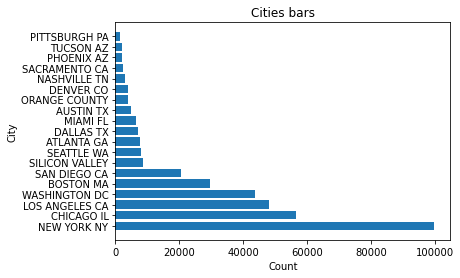

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.barh(city_name,city_values)
plt.title('Cities bars')
plt.ylabel('City')
plt.xlabel('Count')
plt.savefig('week2.jpg',bbox_inches='tight')
plt.show()

# Age binning

In [81]:
#master_dataset['Age'].value_counts()

age_bins = np.linspace(min(master_dataset["Age"]), max(master_dataset["Age"]), 4)
group_names = ['18 - 32', '33 - 48', '49 - 65']
master_dataset['Age-binned'] = pd.cut(master_dataset['Age'], age_bins, labels=group_names, include_lowest=True )

C:\Users\10\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [82]:
master_dataset[['Age','Age-binned']].head(20)

,Age,Age-binned
0,36,33 - 48
1,36,33 - 48
2,36,33 - 48
3,36,33 - 48
4,36,33 - 48
5,36,33 - 48
6,36,33 - 48
7,36,33 - 48
8,36,33 - 48
9,36,33 - 48


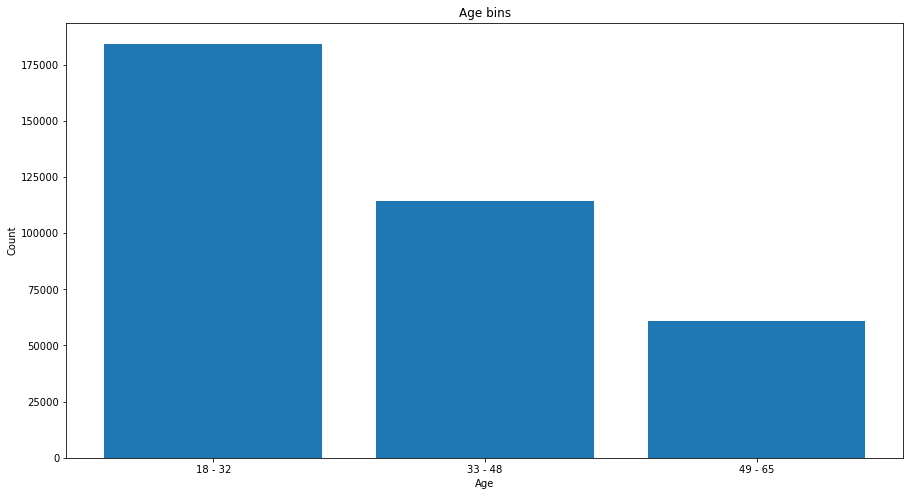

In [83]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

pyplot.figure(figsize=(15,8))
pyplot.bar(group_names, master_dataset["Age-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Age")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Age bins")
plt.pyplot.savefig('week21.jpg',bbox_inches='tight')

# Payment mode

In [28]:
pay_count = master_dataset['Payment_Mode'].value_counts()
pay_count

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

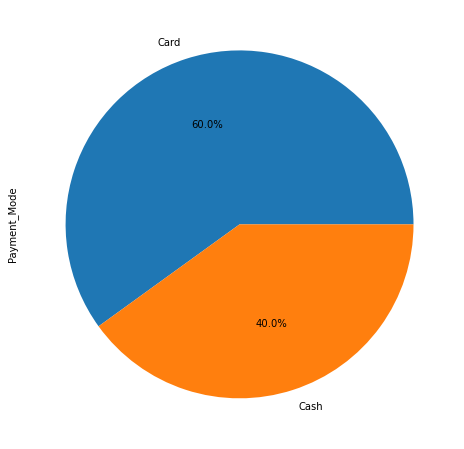

In [84]:
pyplot.figure(figsize=(15,8))
pay_count.plot.pie(autopct="%.1f%%")
plt.pyplot.savefig('week22.jpg',bbox_inches='tight')

# Genders

In [30]:
gender_count = master_dataset['Gender'].value_counts()
gender_count

Male      205912
Female    153480
Name: Gender, dtype: int64

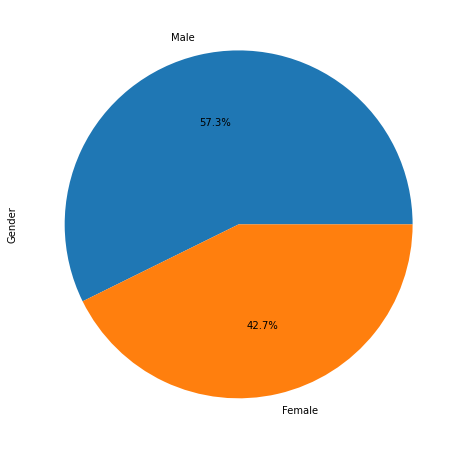

In [85]:
pyplot.figure(figsize=(15,8))
gender_count.plot.pie(autopct="%.1f%%")
plt.pyplot.savefig('week23.jpg',bbox_inches='tight')

In [32]:
master_dataset = master_dataset.drop(['Age-binned'], axis=1)

# Calculating Profit 

In [33]:
master_dataset['Profit'] = master_dataset['Price Charged'] - master_dataset['Cost of Trip']
master_dataset

,Customer ID,City,Income (USD/Month),Gender,Age,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Profit
0,1,NEW YORK NY,16359,Male,36,10008434,2016-02-06,Yellow Cab,42.48,1422.30,576.0288,Cash,846.2712
1,1,NEW YORK NY,16359,Male,36,10012732,2016-03-04,Pink Cab,42.40,703.09,457.9200,Card,245.1700
2,1,NEW YORK NY,16359,Male,36,10053182,2016-07-13,Yellow Cab,8.12,233.10,100.3632,Card,132.7368
3,1,NEW YORK NY,16359,Male,36,10055394,2016-07-24,Yellow Cab,20.52,564.04,278.2512,Cash,285.7888
4,1,NEW YORK NY,16359,Male,36,10074090,2016-09-03,Yellow Cab,22.54,596.98,294.8232,Cash,302.1568
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,60000,BOSTON MA,20303,Female,27,10393188,2018-10-19,Yellow Cab,8.00,114.87,111.3600,Cash,3.5100
359388,60000,BOSTON MA,20303,Female,27,10425458,2018-12-15,Yellow Cab,10.40,141.24,124.8000,Card,16.4400
359389,60000,BOSTON MA,20303,Female,27,10425480,2018-12-11,Yellow Cab,9.70,127.62,132.6960,Card,-5.0760
359390,60000,BOSTON MA,20303,Female,27,10434169,2018-12-28,Yellow Cab,35.64,603.94,487.5552,Cash,116.3848


In [34]:
a = master_dataset["Date of Travel"][0][0:4]
a

'2016'

# Splitting the companies

In [35]:
df_pinkcab = master_dataset[master_dataset['Company'] == 'Pink Cab']
df_pinkcab

,Customer ID,City,Income (USD/Month),Gender,Age,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Profit
1,1,NEW YORK NY,16359,Male,36,10012732,2016-03-04,Pink Cab,42.40,703.09,457.920,Card,245.170
12,1,NEW YORK NY,16359,Male,36,10226027,2017-09-17,Pink Cab,23.92,468.05,282.256,Cash,185.794
15,1,NEW YORK NY,16359,Male,36,10241365,2017-10-21,Pink Cab,38.50,733.87,462.000,Cash,271.870
20,1,NEW YORK NY,16359,Male,36,10270727,2017-12-10,Pink Cab,20.70,381.47,211.140,Card,170.330
35,2,NEW YORK NY,12069,Male,31,10075888,2016-09-14,Pink Cab,20.23,245.97,202.300,Card,43.670
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359373,59999,BOSTON MA,24577,Male,38,10419747,2018-12-05,Pink Cab,28.25,369.84,305.100,Card,64.740
359377,60000,BOSTON MA,20303,Female,27,10064210,2016-08-20,Pink Cab,33.28,462.17,382.720,Cash,79.450
359380,60000,BOSTON MA,20303,Female,27,10229319,2017-10-03,Pink Cab,42.40,493.61,453.680,Card,39.930
359382,60000,BOSTON MA,20303,Female,27,10253269,2017-11-10,Pink Cab,38.88,503.12,419.904,Card,83.216


In [36]:
df_yellowcab = master_dataset[master_dataset['Company'] == 'Yellow Cab']
df_yellowcab

,Customer ID,City,Income (USD/Month),Gender,Age,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Profit
0,1,NEW YORK NY,16359,Male,36,10008434,2016-02-06,Yellow Cab,42.48,1422.30,576.0288,Cash,846.2712
2,1,NEW YORK NY,16359,Male,36,10053182,2016-07-13,Yellow Cab,8.12,233.10,100.3632,Card,132.7368
3,1,NEW YORK NY,16359,Male,36,10055394,2016-07-24,Yellow Cab,20.52,564.04,278.2512,Cash,285.7888
4,1,NEW YORK NY,16359,Male,36,10074090,2016-09-03,Yellow Cab,22.54,596.98,294.8232,Cash,302.1568
5,1,NEW YORK NY,16359,Male,36,10080481,2016-09-25,Yellow Cab,14.70,427.82,181.6920,Card,246.1280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359386,60000,BOSTON MA,20303,Female,27,10371936,2018-09-08,Yellow Cab,31.32,505.45,432.2160,Card,73.2340
359387,60000,BOSTON MA,20303,Female,27,10393188,2018-10-19,Yellow Cab,8.00,114.87,111.3600,Cash,3.5100
359388,60000,BOSTON MA,20303,Female,27,10425458,2018-12-15,Yellow Cab,10.40,141.24,124.8000,Card,16.4400
359389,60000,BOSTON MA,20303,Female,27,10425480,2018-12-11,Yellow Cab,9.70,127.62,132.6960,Card,-5.0760


# company vs seasons' trips

In [37]:
#pink company

df_seasons_pink = df_pinkcab[['Date of Travel' , 'Company', 'Profit']]

for index, row in df_seasons_pink.iterrows():
        
    if row['Date of Travel'][5:7] == "12" or row['Date of Travel'][5:7] == "01" or row['Date of Travel'][5:7] == "02":
        df_seasons_pink["Date of Travel"][index] = 'winter'        
        
    if row['Date of Travel'][5:7] == "03" or row['Date of Travel'][5:7] == "04" or row['Date of Travel'][5:7] == "05":
        df_seasons_pink["Date of Travel"][index] = 'spring' 
        
    if row['Date of Travel'][5:7] == "06" or row['Date of Travel'][5:7] == "07" or row['Date of Travel'][5:7] == "08":
        df_seasons_pink["Date of Travel"][index] = 'summer' 
        
    if row['Date of Travel'][5:7] == "09" or row['Date of Travel'][5:7] == "10" or row['Date of Travel'][5:7] == "11":
        df_seasons_pink["Date of Travel"][index] = 'autumn'    


C:\Users\10\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\10\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\10\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

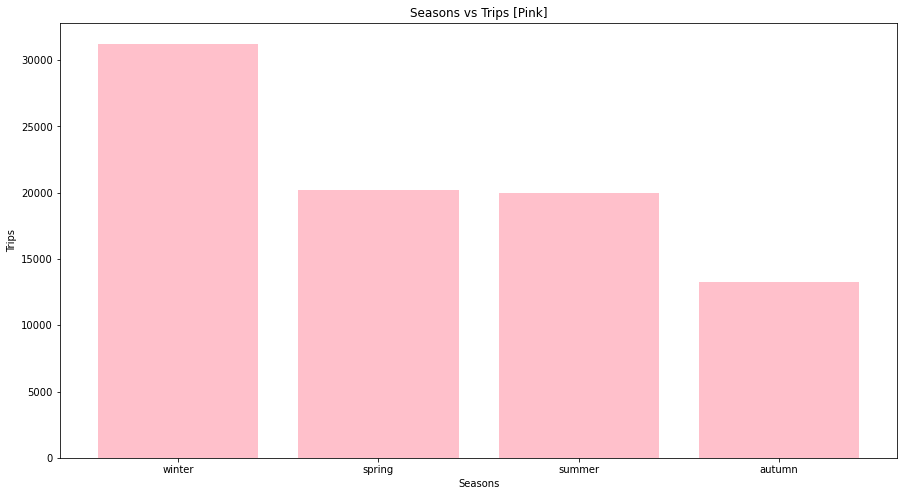

In [86]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

seasons = ['winter' , 'spring' , 'summer' , 'autumn']

pyplot.figure(figsize=(15,8))

pyplot.bar(seasons, df_seasons_pink["Date of Travel"].value_counts(), color ='pink')

# set x/y labels and plot title
plt.pyplot.xlabel("Seasons")
plt.pyplot.ylabel("Trips")
plt.pyplot.title("Seasons vs Trips [Pink]")
plt.pyplot.savefig('week24.jpg',bbox_inches='tight')

# Seasons vs Profit 

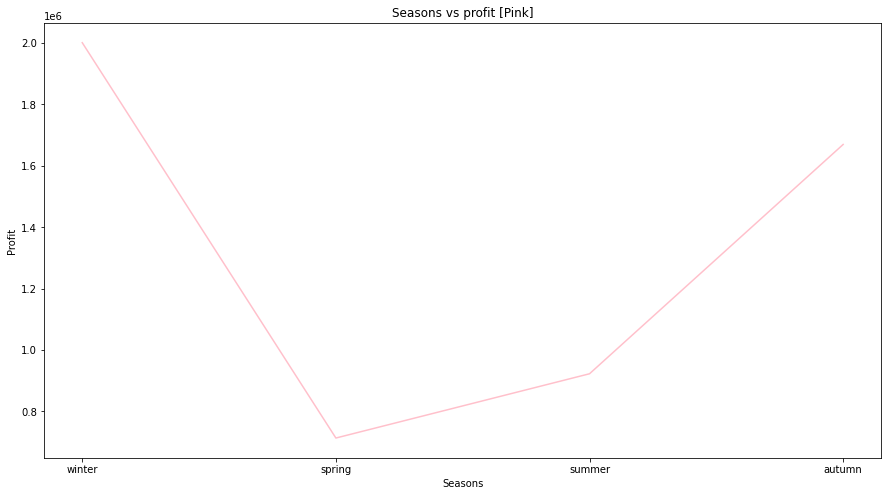

In [87]:
%matplotlib inline

pyplot.figure(figsize=(15,8))

pyplot.plot(seasons,df_seasons_pink.groupby(['Date of Travel'])['Profit'].sum(), color ='pink')

plt.pyplot.xlabel("Seasons")
plt.pyplot.ylabel("Profit")
plt.pyplot.title("Seasons vs profit [Pink]")
plt.pyplot.savefig('week25.jpg',bbox_inches='tight')

In [40]:
#yellow company

df_seasons_yellow = df_yellowcab[['Date of Travel' , 'Company', 'Profit']]

for index, row in df_seasons_yellow.iterrows():
        
    if row['Date of Travel'][5:7] == "12" or row['Date of Travel'][5:7] == "01" or row['Date of Travel'][5:7] == "02":
        df_seasons_yellow["Date of Travel"][index] = 'winter'        
        
    if row['Date of Travel'][5:7] == "03" or row['Date of Travel'][5:7] == "04" or row['Date of Travel'][5:7] == "05":
        df_seasons_yellow["Date of Travel"][index] = 'spring' 
        
    if row['Date of Travel'][5:7] == "06" or row['Date of Travel'][5:7] == "07" or row['Date of Travel'][5:7] == "08":
        df_seasons_yellow["Date of Travel"][index] = 'summer' 
        
    if row['Date of Travel'][5:7] == "09" or row['Date of Travel'][5:7] == "10" or row['Date of Travel'][5:7] == "11":
        df_seasons_yellow["Date of Travel"][index] = 'autumn'    


C:\Users\10\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\10\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\10\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\10\anaconda3\lib\site-packages

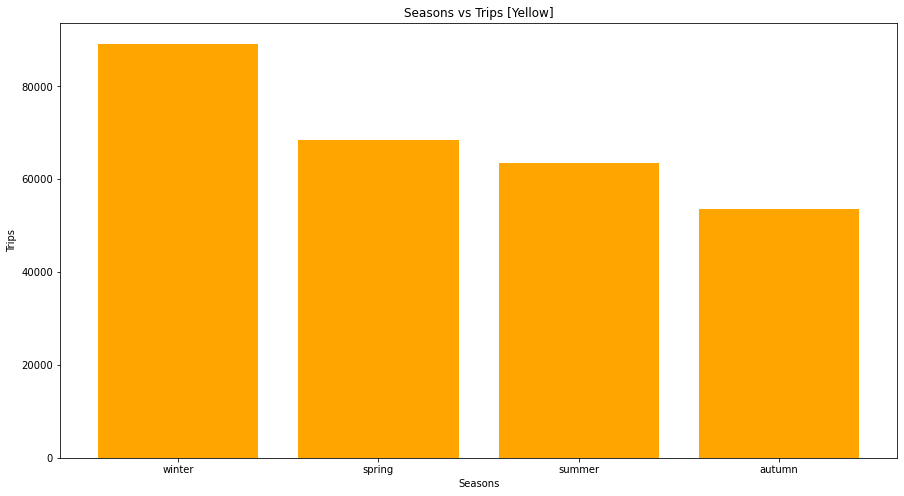

In [88]:
%matplotlib inline

pyplot.figure(figsize=(15,8))

pyplot.bar(seasons, df_seasons_yellow["Date of Travel"].value_counts(), color ='orange')

# set x/y labels and plot title
plt.pyplot.xlabel("Seasons")
plt.pyplot.ylabel("Trips")
plt.pyplot.title("Seasons vs Trips [Yellow]")
plt.pyplot.savefig('week26.jpg',bbox_inches='tight')

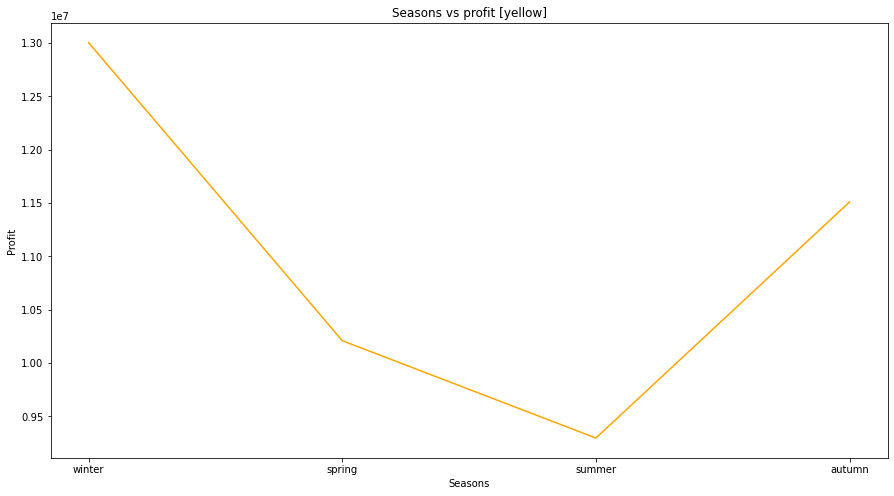

In [89]:
%matplotlib inline

pyplot.figure(figsize=(15,8))

pyplot.plot(seasons,df_seasons_yellow.groupby(['Date of Travel'])['Profit'].sum(), color ='orange')

plt.pyplot.xlabel("Seasons")
plt.pyplot.ylabel("Profit")
plt.pyplot.title("Seasons vs profit [yellow]")
plt.pyplot.savefig('week27.jpg',bbox_inches='tight')

# Years vs Profit 

In [43]:
df_years_pink = df_pinkcab[['Date of Travel', 'Profit']]

for index, row in df_years_pink.iterrows():
        
    if row['Date of Travel'][0:4] == "2016":
        df_years_pink["Date of Travel"][index] = '2016'        
        
    if row['Date of Travel'][0:4] == "2017":
        df_years_pink["Date of Travel"][index] = '2017'  
        
    if row['Date of Travel'][0:4] == "2018":
        df_years_pink["Date of Travel"][index] = '2018'   
    
        
df_years_yellow = df_yellowcab[['Date of Travel', 'Profit']]

for index, row in df_years_yellow.iterrows():
        
    if row['Date of Travel'][0:4] == "2016":
        df_years_yellow["Date of Travel"][index] = '2016'        
        
    if row['Date of Travel'][0:4] == "2017":
        df_years_yellow["Date of Travel"][index] = '2017'  
        
    if row['Date of Travel'][0:4] == "2018":
        df_years_yellow["Date of Travel"][index] = '2018'   


C:\Users\10\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\10\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\10\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\10\an

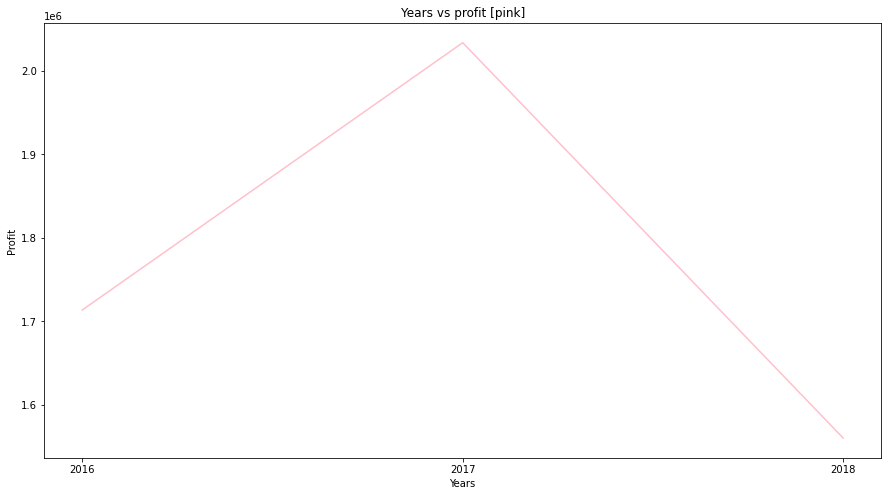

In [90]:
%matplotlib inline
years = ["2016", "2017" , "2018"]
pyplot.figure(figsize=(15,8))

pyplot.plot(years,df_years_pink.groupby(['Date of Travel'])['Profit'].sum(), color ='pink')

plt.pyplot.xlabel("Years")
plt.pyplot.ylabel("Profit")
plt.pyplot.title("Years vs profit [pink]")
plt.pyplot.savefig('week28.jpg',bbox_inches='tight')

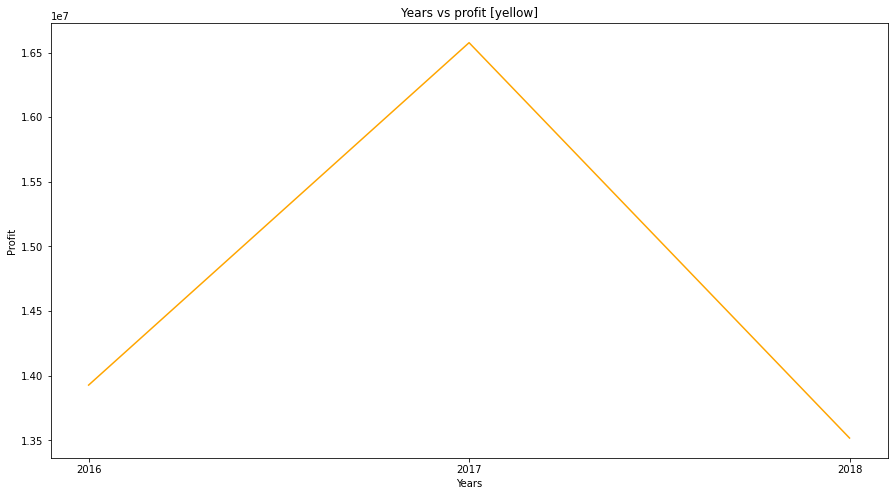

In [91]:
%matplotlib inline

pyplot.figure(figsize=(15,8))

pyplot.plot(years,df_years_yellow.groupby(['Date of Travel'])['Profit'].sum(), color ='orange')

plt.pyplot.xlabel("Years")
plt.pyplot.ylabel("Profit")
plt.pyplot.title("Years vs profit [yellow]")
plt.pyplot.savefig('week29.jpg',bbox_inches='tight')